In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload

In [22]:
%autoreload

In [3]:
from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

In [4]:
import lnn as lnn

In [23]:
paramsDict = {}
catName = 'COMAP_z2.39-3.44_1140Mpc_seed_13579_rotate_0_subfield_0.npz'
# catName = 'COMAP_z2.39-3.44_1140Mpc_seed_13899_rotate_0_subfield_9__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01.npz'
paramsDict['halo_catalogue_file'] = '../catalogues2/'+ catName
paramsDict['map_output_file'] = '../maps2/basic_Li/' + catName
params = lnn.setParams(paramsDict, params)

In [24]:
maps, lumInfo = lnn.makeMapAndLumFunc(params, noise=11)
lnn.saveMapAndLum(maps, lumInfo)

[[3433.3200182819933, 4047.089950759761, 4770.5826961439325, 5623.4132519034911, 6628.7031618264409, 7813.707376518093, 9210.5531768948204, 10857.111194022038, 12798.022139979526, 15085.907086001793, 17782.794100389227, 20961.799924531257, 24709.112279856017, 29126.326549087382, 34333.200182819935, 40470.899507597569, 47705.826961439321, 56234.132519034909, 66287.031618264416, 78137.073765180859, 92105.531768948204, 108571.11194022039, 127980.22139979526, 150859.07086001794, 177827.94100389228, 209617.99924531256, 247091.12279856016, 291263.26549087383, 343332.00182819931, 404708.99507597572, 477058.26961439225, 562341.32519034913, 662870.31618264411, 781370.73765181017, 921055.31768948201, 1085711.1194022039, 1279802.2139979526, 1508590.7086001763, 1778279.4100389229, 2096179.9924531258, 2470911.2279856019, 2912632.6549087386, 3433320.0182819935, 4047089.9507597568, 4770582.6961439224, 5623413.2519034911, 6628703.1618264411, 7813707.3765180856, 9210553.1768948194], [548396, 500312, 45

In [6]:
data = np.load(paramsDict['map_output_file'][:-4] + '_map.npz')

In [8]:
type(data['map_cube'])

numpy.ndarray

In [9]:
data.keys()

['map_cube',
 'pix_size_y',
 'map_pixel_dec',
 'map_pixel_ra',
 'npix_x',
 'map_frequencies',
 'pix_size_x',
 'fov_x',
 'fov_y',
 'npix_y']

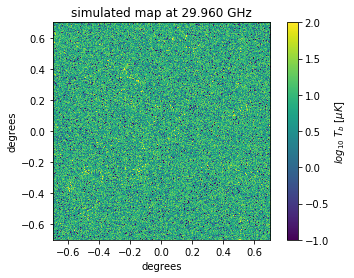

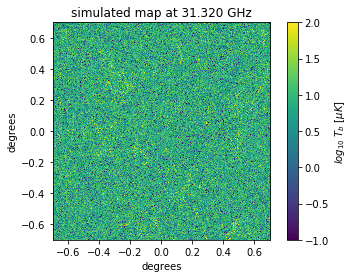

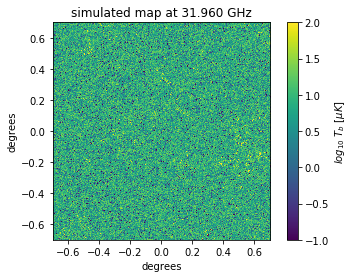

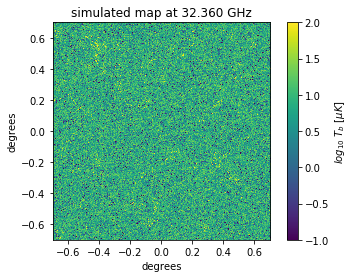

In [10]:
for i in range(2,6):
    if i == 1 or i == 0:
        continue
    plt.figure()
    im = plt.imshow(np.log10(data['map_cube'][:,:,params.nmaps//i]+1e-6), 
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                    vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][params.nmaps//i]))

In [14]:
lumData = np.load(paramsDict['map_output_file'][:-4] + '_lum.npz')

In [15]:
lumData.keys()

['lumFunc', 'logBinCent', 'numberCt']

In [16]:
lumData['lumFunc'][:10]

array([47218, 46801, 45401, 42899, 40555, 36984, 34066, 30507, 26803, 23858])

In [17]:
lumData['lumFunc']

array([47218, 46801, 45401, 42899, 40555, 36984, 34066, 30507, 26803,
       23858, 20923, 18032, 15679, 13677, 11779, 10195,  8675,  7762,
        6754,  5892,  5306,  4647,  4232,  3726,  3463,  3136,  2706,
        2420,  2048,  1778,  1519,  1236,  1002,   771,   600,   426,
         328,   206,   158,    93,    71,    36,    17,    27,     4,
           3,     2,     1,     0])

In [18]:
lumData['numberCt']

array([534422, 487204, 440403, 395002, 352103, 311548, 274564, 240498,
       209991, 183188, 159330, 138407, 120375, 104696,  91019,  79240,
        69045,  60370,  52608,  45854,  39962,  34656,  30009,  25777,
        22051,  18588,  15452,  12746,  10326,   8278,   6500,   4981,
         3745,   2743,   1972,   1372,    946,    618,    412,    254,
          161,     90,     54,     37,     10,      6,      3,      1,
            0])

In [12]:
lumData.keys()

['numberCt', 'logBinCent', 'lumFunc']

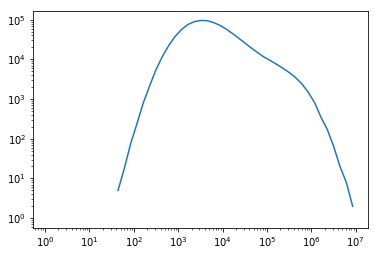

In [14]:
plt.loglog(lumData['logBinCent'], lumData['lumFunc'])

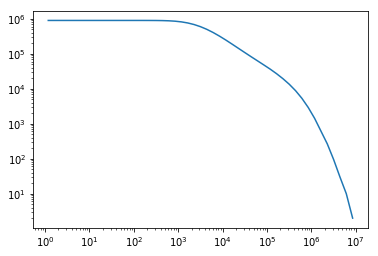

In [15]:
plt.loglog(lumData['logBinCent'], lumData['numberCt'])

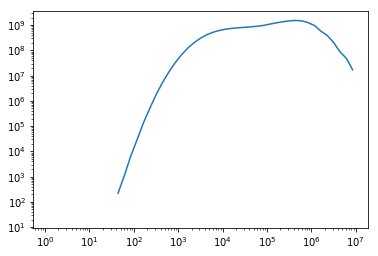

In [16]:
plt.loglog(lumData['logBinCent'], lumData['lumFunc']*lumData['logBinCent'])

In [20]:
paramsDict = {}
catName = 'COMAP_z2.39-3.44_1140Mpc_seed_13579_rotate_180_subfield_3.npz'
paramsDict['halo_catalogue_file'] = '../catalogues/'+ catName
paramsDict['map_output_file'] = '../maps/' + catName
params = lnn.setParams(paramsDict, params)
maps, lumInfo = lnn.makeMapAndLumFunc(params)
lnn.saveMapAndLum(maps, lumInfo)
data = np.load(paramsDict['map_output_file'][:-4] + '_map.npz')

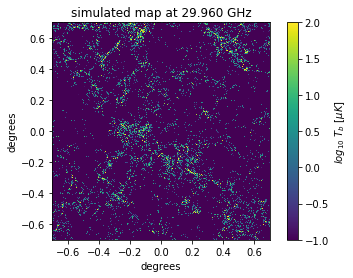

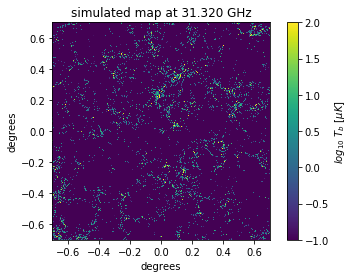

In [21]:
for i in range(2,4):
    if i == 1 or i == 0:
        continue
    plt.figure()
    im = plt.imshow(np.log10(data['map_cube'][:,:,params.nmaps//i]+1e-6), 
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                    vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][params.nmaps//i]))

In [18]:
catName = 'COMAP_z2.39-3.44_1140Mpc_seed_13579_rotate_90_subfield_1.npz'
data = np.load(paramsDict['map_output_file'][:-4] + '_map.npz')

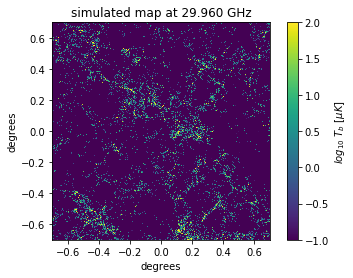

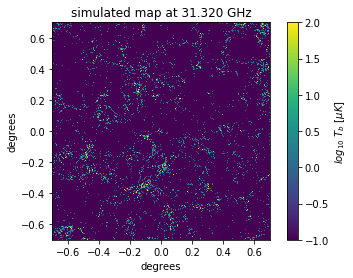

In [19]:
for i in range(2,4):
    if i == 1 or i == 0:
        continue
    plt.figure()
    im = plt.imshow(np.log10(data['map_cube'][:,:,params.nmaps//i]+1e-6), 
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                    vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][params.nmaps//i]))

In [9]:
data.keys()

['npix_x',
 'map_pixel_dec',
 'fov_y',
 'pix_size_y',
 'fov_x',
 'map_cube',
 'map_frequencies',
 'pix_size_x',
 'npix_y',
 'map_pixel_ra']

In [10]:
data['map_frequencies']

array([ 33.96,  33.88,  33.8 ,  33.72,  33.64,  33.56,  33.48,  33.4 ,
        33.32,  33.24,  33.16,  33.08,  33.  ,  32.92,  32.84,  32.76,
        32.68,  32.6 ,  32.52,  32.44,  32.36,  32.28,  32.2 ,  32.12,
        32.04,  31.96,  31.88,  31.8 ,  31.72,  31.64,  31.56,  31.48,
        31.4 ,  31.32,  31.24,  31.16,  31.08,  31.  ,  30.92,  30.84,
        30.76,  30.68,  30.6 ,  30.52,  30.44,  30.36,  30.28,  30.2 ,
        30.12,  30.04,  29.96,  29.88,  29.8 ,  29.72,  29.64,  29.56,
        29.48,  29.4 ,  29.32,  29.24,  29.16,  29.08,  29.  ,  28.92,
        28.84,  28.76,  28.68,  28.6 ,  28.52,  28.44,  28.36,  28.28,
        28.2 ,  28.12,  28.04,  27.96,  27.88,  27.8 ,  27.72,  27.64,
        27.56,  27.48,  27.4 ,  27.32,  27.24,  27.16,  27.08,  27.  ,
        26.92,  26.84,  26.76,  26.68,  26.6 ,  26.52,  26.44,  26.36,
        26.28,  26.2 ,  26.12,  26.04])

In [11]:
data['fov_y']

array(1.4)

In [12]:
data['pix_size_y']

array(0.00546875)

In [34]:
params = lnn.defaultParams()
paramsDict = {}
catName = 'COMAP_z2.39-3.44_1140Mpc_seed_13579_rotate_0_subfield_0.npz'
paramsDict['halo_catalogue_file'] = '../catalogues/'+ catName
paramsDict['map_output_file'] = '../maps/' + catName
params = lnn.setParams(paramsDict, params)

In [35]:
llm.debug.verbose = True
mapinst   = llm.params_to_mapinst(params)

halos, cosmo = llm.load_peakpatch_catalogue(params.halo_catalogue_file, verbose=llm.debug.verbose)
halos        = llm.cull_peakpatch_catalogue(halos, params.min_mass, mapinst, verbose=llm.debug.verbose)
halos.Lco    = llm.Mhalo_to_Lco(halos, params.model, params.coeffs, verbose=llm.debug.verbose)
lumInfo = lnn.makeLumFunc(halos)
mapinst.maps = llm.Lco_to_map(halos,mapinst, verbose=llm.debug.verbose)

	halo catalogue contains:
		 ['vz', 'x', 'zhalo', 'y', 'cosmo_header', 'vx', 'vy', 'M', 'z', 'zform']

	958954 halos loaded
   0 sec

	897765 halos remain after mass/map cut
   0 sec

	Mhalo to Lco calculated
   1 sec

	Binning halos into map
   0 sec


In [23]:
zMean = np.mean(halos.redshift)

In [24]:
1.4/(180)*np.pi*zMean

0.069788568590940653

In [27]:
print(max(halos.x_pos))
print(min(halos.x_pos))
print(max(halos.x_pos)-min(halos.x_pos))
print((max(halos.x_pos)-min(halos.x_pos))/256)

500.485
281.433
219.051
0.855669140816


In [38]:
llm.redshift_to_chi(mapinst.nu_rest/mapinst.nu_binedges-1,cosmo)

array([ 5771.40015278,  5781.32705366,  5791.26776981,  5801.22234111,
        5811.19080991,  5821.1732186 ,  5831.16958164,  5841.17997141,
        5851.20439724,  5861.24291554,  5871.29556528,  5881.36238318,
        5891.44340869,  5901.53868389,  5911.64825356,  5921.77215028,
        5931.91041757,  5942.06310259,  5952.23024805,  5962.41188124,
        5972.60805916,  5982.81882228,  5993.04421397,  6003.2842791 ,
        6013.53904477,  6023.80857884,  6034.09290867,  6044.3920944 ,
        6054.70616326,  6065.03516864,  6075.37915861,  6085.73817962,
        6096.11226706,  6106.50147601,  6116.9058606 ,  6127.32544936,
        6137.76030302,  6148.21046866,  6158.67599098,  6169.15691811,
        6179.65330165,  6190.16519601,  6200.6926287 ,  6211.23567743,
        6221.7943745 ,  6232.36877372,  6242.95893051,  6253.56489638,
        6264.1867159 ,  6274.82444361,  6285.47814127,  6296.14784835,
        6306.833623  ,  6317.53552176,  6328.25359749,  6338.98790705,
      

In [40]:
zco = np.mean(llm.redshift_to_chi(mapinst.nu_rest/mapinst.nu_binedges-1,cosmo))

In [43]:
1.4/(180)*np.pi * zco * np.mean(mapinst.nu_rest/mapinst.nu_binedges-1) / 256

1.7211679719637767

In [44]:
np.mean(mapinst.nu_rest/mapinst.nu_binedges-1)

2.8658140745882266

In [45]:
zco

6292.3055975791358

In [46]:
1.4/(180)*np.pi

0.024434609527920613

In [47]:
zco * 1.4/(180)*np.pi

153.75003030719535